<a href="https://colab.research.google.com/github/apriandito/pertamina-2/blob/main/01_sederhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [11]:
# 1. Load training data
train_url = (
    "https://raw.githubusercontent.com/apriandito/pertamina-2/"
    "refs/heads/main/data/bbm_fraud_train.csv"
)
df_train = pd.read_csv(train_url)
df_train.head()

,volume_liters,total_amount,hour,is_weekend,loyalty_member,customer_transaction_count,days_since_last_transaction,same_day_transactions,volume_deviation,amount_deviation,...,is_night_transaction,bbm_type_encoded,payment_method_encoded,day_of_week_encoded,customer_type_encoded,spbu_category_encoded,spbu_province_encoded,spbu_city_encoded,is_fraud,fraud_type
0,578.37,8.039343e+06,7,True,False,1,0.0,1,0.000000,0.000000,...,False,3,1,2,1,0,5,13,0,NaN
1,664.13,4.516084e+06,8,False,False,2,109.0,1,0.069022,0.280616,...,False,4,2,6,1,1,3,26,0,NaN
2,163.24,2.024176e+06,12,False,False,3,37.0,1,0.651628,0.583492,...,False,2,2,0,1,1,2,7,0,NaN
3,54.64,7.594557e+05,4,False,False,4,54.0,1,0.850340,0.801955,...,True,3,4,4,1,1,8,24,1,multiple_cards
4,357.87,4.437588e+06,2,True,False,5,8.0,1,0.015894,0.121926,...,True,2,1,2,1,2,8,24,0,NaN


In [12]:
# 2. Siapkan fitur & target
X = df_train.drop(columns=["is_fraud", "fraud_type"])
y = df_train["is_fraud"]

In [13]:
# 3. Split data (chronological, tanpa shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [14]:
# 4. Build & fit Decision Tree
model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

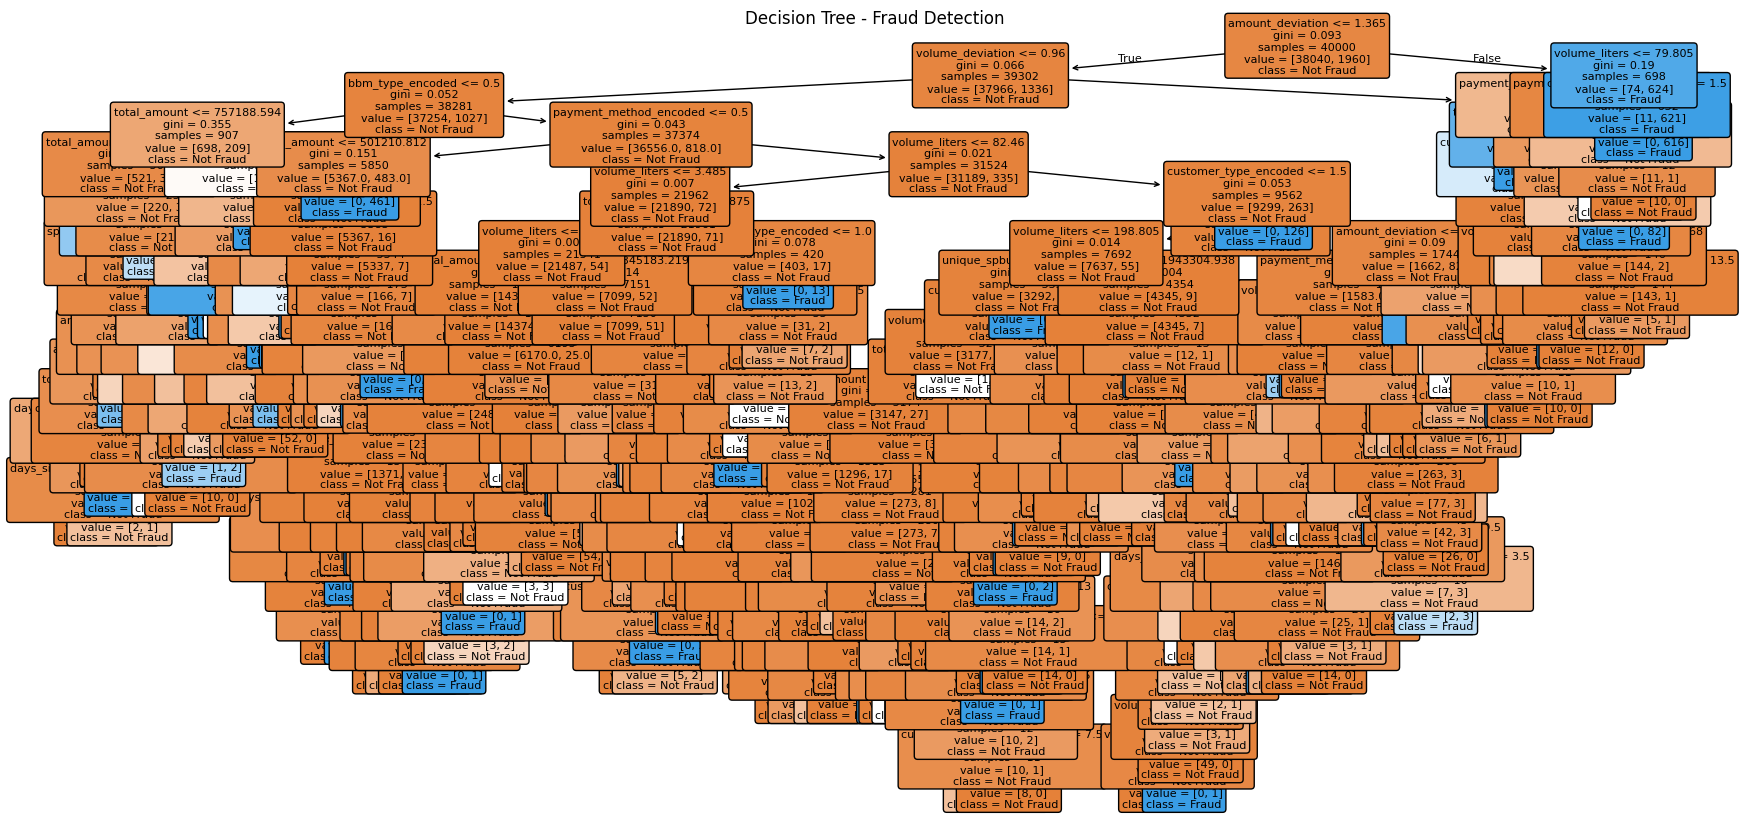

In [15]:
# 5. Tampilkan Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Not Fraud", "Fraud"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree - Fraud Detection")
plt.show()

In [16]:
# 5. Predict & evaluasi
y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrik
accuracy    = accuracy_score(y_test, y_pred)
precision   = precision_score(y_test, y_pred)
recall      = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
f1          = f1_score(y_test, y_pred)
roc_auc     = roc_auc_score(y_test, y_proba)

print("=== Evaluation on Test Set ===")
print(f"Accuracy   : {accuracy:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score   : {f1:.4f}")
print(f"ROC AUC    : {roc_auc:.4f}")

=== Evaluation on Test Set ===
Accuracy   : 0.9911
Precision  : 0.9199
Recall     : 0.8996
Specificity: 0.9959
F1-score   : 0.9096
ROC AUC    : 0.9538


In [17]:
# 6. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
fig = go.Figure()

# ROC curve line
fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'Decision Tree (AUC = {roc_auc:.3f})',
    line=dict(width=2)
))

# Diagonal random guess
fig.add_trace(go.Scatter(
    x=[0,1], y=[0,1],
    mode='lines',
    name='Random Guess',
    line=dict(dash='dash', width=1)
))

fig.update_layout(
    title='ROC Curve - Decision Tree Fraud Detection',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend=dict(x=0.65, y=0.15),
    template='plotly_white',
    width=700,
    height=500
)
fig.show()

In [18]:
# 7. Real‑time prediction
rt_url = (
    "https://raw.githubusercontent.com/apriandito/pertamina-2/"
    "refs/heads/main/data/bbm_fraud_realtime.csv"
)
df_rt = pd.read_csv(rt_url)

# Pastikan kolom fitur sama
feature_cols = X.columns.tolist()
X_rt = df_rt[feature_cols]

df_rt['predicted_is_fraud'] = model.predict(X_rt)
df_rt['fraud_probability']  = model.predict_proba(X_rt)[:, 1]

print("\n=== Real‑time Prediction Summary ===")
print(f"Total transaksi    : {len(df_rt)}")
print(f"Predicted fraud     : {df_rt['predicted_is_fraud'].sum()} ({df_rt['predicted_is_fraud'].mean()*100:.2f}%)")
print(f"Average fraud prob  : {df_rt['fraud_probability'].mean():.4f}")

df_rt.head()


=== Real‑time Prediction Summary ===
Total transaksi    : 5000
Predicted fraud     : 501 (10.02%)
Average fraud prob  : 0.1070


,volume_liters,total_amount,hour,is_weekend,loyalty_member,customer_transaction_count,days_since_last_transaction,same_day_transactions,volume_deviation,amount_deviation,...,is_night_transaction,bbm_type_encoded,payment_method_encoded,day_of_week_encoded,customer_type_encoded,spbu_category_encoded,spbu_province_encoded,spbu_city_encoded,predicted_is_fraud,fraud_probability
0,24.61,3.051640e+05,3,False,False,1,0.0,1,0.000000,0.000000,...,True,2,2,1,2,1,2,5,0,0.00
1,240.81,1.637508e+06,23,True,True,1,0.0,1,0.000000,0.000000,...,True,4,1,2,0,0,9,3,0,0.25
2,78.48,7.847943e+05,12,True,True,2,0.0,1,0.508409,0.352026,...,False,1,0,3,0,0,6,20,1,1.00
3,112.02,1.389048e+06,21,True,True,3,0.0,2,0.220839,0.093351,...,False,2,1,3,0,0,9,28,0,0.00
4,108.44,1.084400e+06,0,True,True,4,6.0,1,0.196369,0.114007,...,True,1,4,3,0,0,9,27,0,0.00
